In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# funcao auxiliar para metodo de aceitacao rejeicao
def randomsample(p):
    p = p / np.sum(p)
    u = np.random.rand()
    s = p[0]
    i = 0
    while u > s:
        i += 1
        s += p[i]
    return i

In [7]:
def pX(x):
    return 1/(2*np.sqrt(x))

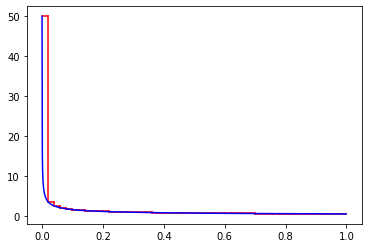

Fração de rejeição : 0.47475999999999996
Aceites : 52524


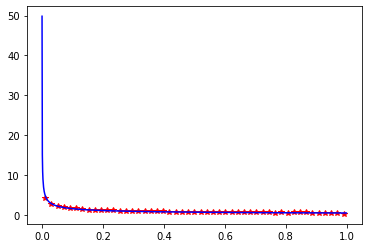

In [8]:
# método aceitação rejeição

N= int(1e5) ##extras para garantir 10000 aceites

# x_min não pode ser 0
x_min = 0.0001
x_max = 1

nRect = 50
drect = (x_max - x_min) / nRect
xi = np.arange(x_min, x_max, drect)
xs = xi + drect

hRect= np.zeros(nRect)
for i in range(nRect):
    xvalues = np.arange(xi[i], xs[i], 0.001)
    hRect[i] = np.max(pX(xvalues))
    plt.plot([xi[i], xi[i]], [pX(xi[i]), hRect[i]], '-r')
    plt.plot([xi[i], xs[i]], [hRect[i], hRect[i]], '-r')
    plt.plot([xs[i], xs[i]], [hRect[i], pX(xs[i])], '-r')

plt.figure(1)
x_px=np.arange(x_min, x_max, 0.001)
plt.plot(x_px, pX(x_px), '-b')
plt.show()

# Método aceitação rejeição

x_aceites = []
xp = np.zeros(N)
yp= np.zeros(N)

i=0
n_aceites=0

Ai = (xs - xi) * hRect
p = Ai / np.sum(Ai)

for i in range(N):
    i_r = randomsample(p)
    
    xp[i] = np.random.rand() * (xs[i_r] - xi[i_r]) + xi[i_r]
    yp[i] = np.random.rand() * hRect[i_r]
    
    if yp[i] <= pX(xp[i]):
        x_aceites.append(xp[i])
        n_aceites += 1

x_aceites = np.array(x_aceites)

print("Fração de rejeição :",(1 - n_aceites / N))
print("Aceites :",n_aceites)


x_max = np.max(x_aceites)
x_min = np.min(x_aceites)
n_bins = 50
dx = (x_max - x_min) / n_bins

values, bins = np.histogram(x_aceites, bins=np.linspace(x_min+dx/2, x_max+dx/2, n_bins))
values = values / (dx * np.sum(values))
# Plot do histograma com a densidade de probabilidade

plt.figure(2)
plt.plot(bins[0:-1], values, '*r')
x_px=np.arange(x_min, x_max, 0.001)
plt.plot(x_px, pX(x_px), '-b')

plt.show()
